# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

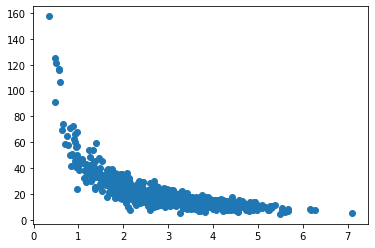

In [62]:
%matplotlib inline
from pylab import *

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [63]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

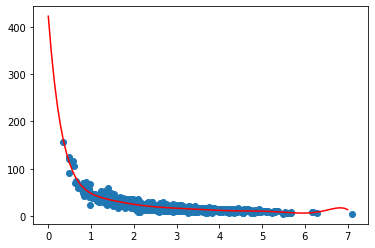

In [64]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [65]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))
print(r2)


0.8830263256616023


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

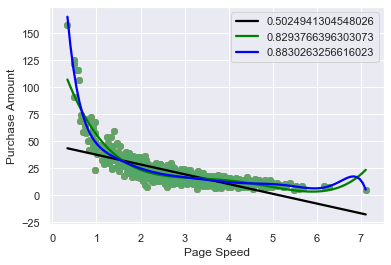

In [108]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds
data = pd.DataFrame({'Page Speed':pageSpeeds, 'Purchase Amount': purchaseAmount})

sns.set()
sns.regplot(x="Page Speed", y="Purchase Amount", data=data, 
           line_kws={'color': 'black'}, order=1, ci=None)
sns.regplot(x="Page Speed", y="Purchase Amount", data=data, 
           line_kws={'color': 'green'}, order=4, ci=None)
sns.regplot(x="Page Speed", y="Purchase Amount", data=data, 
           line_kws={'color': 'blue'}, order=9, ci=None)
plt.legend(labels = [r2_score(y, np.poly1d(np.polyfit(x, y, 1))(x)),
                     r2_score(y, np.poly1d(np.polyfit(x, y, 4))(x)),
                     r2_score(y, np.poly1d(np.polyfit(x, y, 9))(x))])